In [2]:
# Cell 1: Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import os

In [ ]:
# Cell 2: Define dataset paths
train_dir = '17flowerclasses/train'
test_dir = '17flowerclasses/test'

# Check number of classes
num_classes = len(os.listdir(train_dir))
print(f"Number of classes: {num_classes}")

Number of classes: 17


In [ ]:
# Cell 3: Prepare data generators with augmentation for better accuracy
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.0  
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Batch size
batch_size = 32

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 1190 images belonging to 17 classes.
Found 170 images belonging to 17 classes.


In [5]:
# Cell 4: Build the CNN model using transfer learning with MobileNetV2 for high accuracy
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 17)             │         8,721 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,922,577 (11.15 MB)

 Trainable params: 664,593 (2.54 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [6]:
# Cell 5: Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
# Cell 6: Define early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

c:\Users\m-pc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.4542 - loss: 1.8015 - val_accuracy: 0.6938 - val_loss: 0.9449
Epoch 2/50
 1/37 ━━━━━━━━━━━━━━━━━━━━ 29s 808ms/step - accuracy: 0.7188 - loss: 1.2033

c:\Users\m-pc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 133ms/step - accuracy: 0.7188 - loss: 1.2033 - val_accuracy: 0.6875 - val_loss: 0.9602
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.7522 - loss: 0.7645 - val_accuracy: 0.8125 - val_loss: 0.5950
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - accuracy: 0.8750 - loss: 0.4551 - val_accuracy: 0.8000 - val_loss: 0.6035
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.8092 - loss: 0.5792 - val_accuracy: 0.8062 - val_loss: 0.5230
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - accuracy: 0.7812 - loss: 0.4601 - val_accuracy: 0.8125 - val_loss: 0.5272
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.8558 - loss: 0.4757 - val_accuracy: 0.8062 - val_loss: 0.4877
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - accuracy: 0.9375 - loss: 0.2015 - val_accuracy: 0.8125 - val_loss: 0.4724
Epoch 9/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.8661 - loss: 0.3961 - val_accuracy: 0.8375 - val_loss: 0.

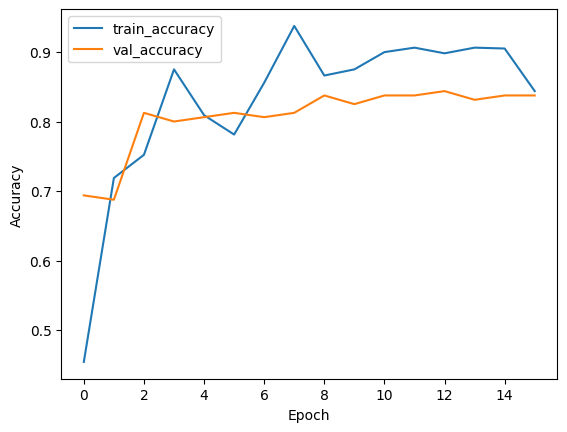

In [ ]:
# Cell 7: Train the model
epochs = 50  

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size,
    callbacks=[early_stopping]
)

# Plot training history
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [9]:
# Cell 8: Evaluate the model on test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc * 100:.2f}%")

6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 627ms/step - accuracy: 0.8412 - loss: 0.4248
Test accuracy: 84.12%


Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.9240 - loss: 0.2425 - val_accuracy: 0.8188 - val_loss: 0.5201
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step - accuracy: 0.9688 - loss: 0.1574 - val_accuracy: 0.8188 - val_loss: 0.5238
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.9352 - loss: 0.1837 - val_accuracy: 0.8313 - val_loss: 0.5893
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 124ms/step - accuracy: 0.9688 - loss: 0.1257 - val_accuracy: 0.8313 - val_loss: 0.5866
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.9577 - loss: 0.1185 - val_accuracy: 0.8500 - val_loss: 0.5926
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 1.


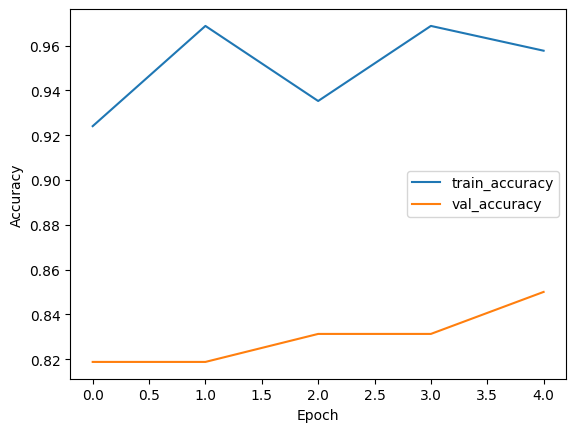

6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 756ms/step - accuracy: 0.8235 - loss: 0.5123
Test accuracy after fine-tuning: 82.35%


In [ ]:
# Cell 9: Fine-tune the model by unfreezing some layers for potentially higher accuracy
# Unfreeze the last few layers of the base model
base_model.trainable = True
fine_tune_at = len(base_model.layers) - 20  
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Recompile with lower learning rate
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Continue training
history_fine = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size,
    callbacks=[early_stopping]
)

# Plot fine-tuning history
plt.plot(history_fine.history['accuracy'], label='train_accuracy')
plt.plot(history_fine.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Re-evaluate
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy after fine-tuning: {test_acc * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted class for flower1.jpeg: WindFlower


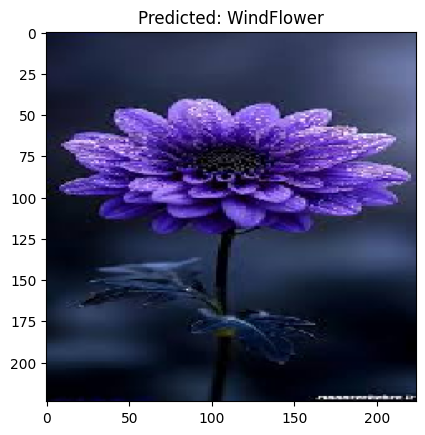

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
Predicted class for flower2.jpg: Bluebell


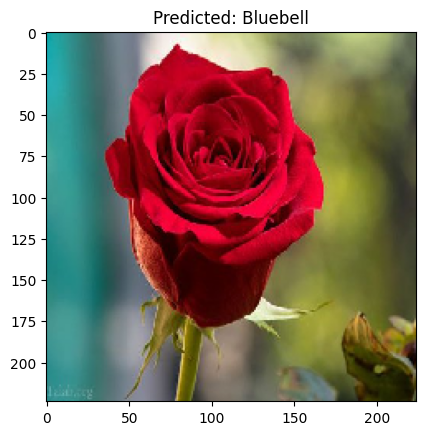

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
Predicted class for flower3.jpeg: Crocus


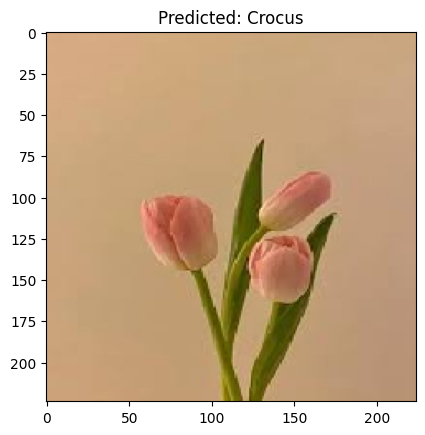

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
Predicted class for flower4.jpg: Daisy


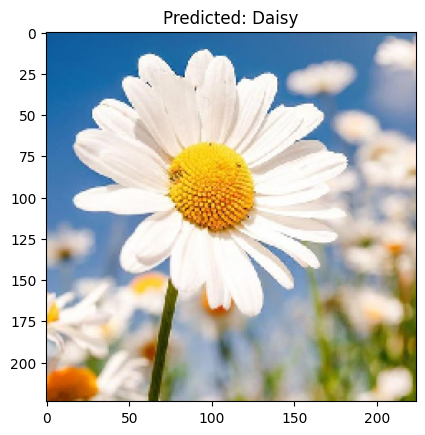

In [13]:
# Cell 10: Test on external images
# Upload your external flower images to Kaggle (e.g., via 'Add Data' or drag to notebook).
# Assume images are in a folder like '/kaggle/input/external-flowers/' or list their paths here.
# Replace with your actual image paths.

external_image_paths = [
    'flower1.jpeg',
    'flower2.jpg',
    'flower3.jpeg',
    'flower4.jpg'
]

class_indices = train_generator.class_indices
class_names = list(class_indices.keys())

for img_path in external_image_paths:
    if os.path.exists(img_path):
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0
        predictions = model.predict(img_array)
        predicted_class = class_names[np.argmax(predictions)]
        print(f"Predicted class for {img_path}: {predicted_class}")
        plt.imshow(img)
        plt.title(f"Predicted: {predicted_class}")
        plt.show()
    else:
        print(f"Image not found: {img_path}")